In [143]:
from google.cloud import storage
from google.oauth2 import service_account
from google.cloud import vision
from google.cloud.vision import types

from collections import defaultdict
import re

import numpy as np
import os
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
credentials = service_account.Credentials.from_service_account_file('creds/loveletters-366bafa3ef21.json')

In [30]:
# client = storage.Client(project='loveletters', credentials=credentials)
# bucket = client.get_bucket('loveletters')

In [3]:
client_vision = vision.ImageAnnotatorClient(credentials=credentials)

In [14]:
loveletters = defaultdict()

for i, l in enumerate(range(1,37)):
    
    print(f'letter #{l:02d}..', end='')
    
    request = {'image': {'source': 
                     {'image_uri': f'gs://loveletters/arn_love_letter_Page_{l:02d}.png'}},
          'features': [{'type': vision.enums.Feature.Type.DOCUMENT_TEXT_DETECTION}]}

    response = client_vision.annotate_image(request)
    
    loveletters[l] = response.full_text_annotation.text
    
    print('ok')  

letter #01..ok
letter #02..ok
letter #03..ok
letter #04..ok
letter #05..ok
letter #06..ok
letter #07..ok
letter #08..ok
letter #09..ok
letter #10..ok
letter #11..ok
letter #12..ok
letter #13..ok
letter #14..ok
letter #15..ok
letter #16..ok
letter #17..ok
letter #18..ok
letter #19..ok
letter #20..ok
letter #21..ok
letter #22..ok
letter #23..ok
letter #24..ok
letter #25..ok
letter #26..ok
letter #27..ok
letter #28..ok
letter #29..ok
letter #30..ok
letter #31..ok
letter #32..ok
letter #33..ok
letter #34..ok
letter #35..ok
letter #36..ok


In [39]:
loveletters_ = defaultdict()

for _ in loveletters:
    loveletters_[_] = re.sub(r'^[\.\s+\,\!]', '', re.sub(r'\s{2,}', ' ', re.split(r'\s+support\s+your\s+love\s+letter\s*', re.split(r'\(\s*you\s+get\s+the\s+idea\s*\.*\s*\)', 
                               re.sub(r'[\-\,\:\;\"\'\/0-9]', '', loveletters[_].replace('\n', ' ') \
                                      .lower()))[-1])[-1].strip())).strip()

In [40]:
loveletters_

defaultdict(None,
            {1: 'you are mine ! and that is exactly how i felt when i met you der the first time i remember it as it was yesterday. it was at a party cake was just served and there you were so golden so pure but so creamy. i wanted to resist you but you sweet smell pulled me close and close. there was holding yon starring at you smelling you was love at first smell and then i did it.... took a little bite out of your luscious biscuit another and another ove and over until only low botlom biscuit with you delicious fluffy ream was lest i took a big eik and all you ream was gone. with the last bite i finished on off. so sweet so nich so gummy! was hooked happy ! and never looked back on this day on you are always by side at partys atherings or even when i take you with me to batch a move i dont knoco cono arnotts is as it ays repeatedly on your package but let me tell arnotts you are mine! you are my custard cream da je',
             2: 'relax happy love',
            

In [144]:
mask_sc = np.array(Image.open("cookie.jpg"))
image_colors = ImageColorGenerator(mask_sc)

In [140]:
wordcloud = WordCloud(max_font_size=80, mask=mask_sc, background_color="white", max_words=1000).generate(' '.join(list(loveletters_.values())))

(-0.5, 1426.5, 1365.5, -0.5)

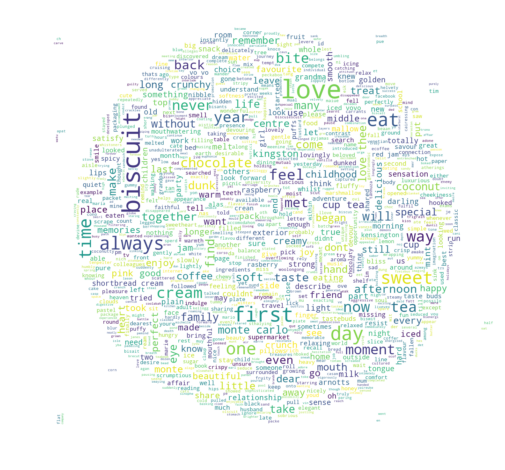

In [141]:
fig = plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [134]:
fig.savefig('loveletters_36_cookie_shaped.png', dpi=300)